In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 # Read Data

In [2]:
train = pd.read_csv(r"heart.csv")

In [3]:
train.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


# EDA

In [4]:
train.shape

(303, 14)

In [5]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
train.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
train.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [8]:
train.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
countFemale = len(train[train.sex == 0])
countMale = len(train[train.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(train.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(train.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


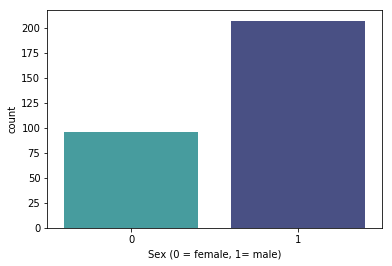

In [10]:
import seaborn as sns
sns.countplot(x='sex', data=train, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [11]:
train.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


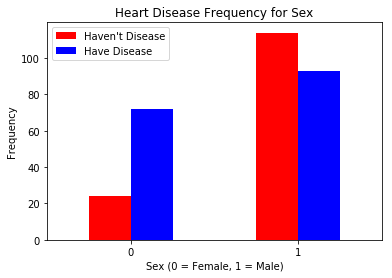

In [12]:
pd.crosstab(train.sex,train.target).plot(kind="bar",color=['red','blue' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [13]:
train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Understanding Features
> 1. thalach - maximum heart rate achieved.
> 2. exang - exercise induced angina (1 = yes; 0 = no) 
> 3. oldpeak - ST depression induced by exercise relative to rest.
> 4. FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)
> 5. cp - chest pain type 0, 1, 2, 3
> 6. the slope of the peak exercise ST segment
> 7. number of major vessels (0-3) colored by flourosopy
> 8. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

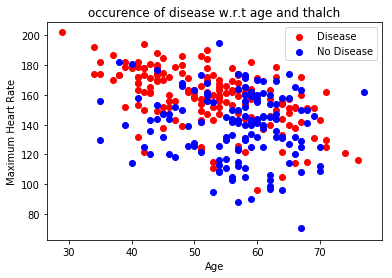

In [14]:
plt.scatter(x=train.age[train.target==1], y=train.thalach[train.target==1], c='red')
plt.scatter(x=train.age[train.target ==0], y=train.thalach[train.target ==0], c="blue")
plt.title('occurence of disease w.r.t age and thalch')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.show()

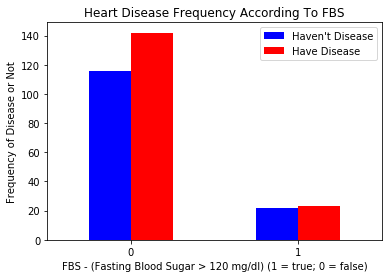

In [15]:
pd.crosstab(train.fbs,train.target).plot(kind="bar", color=['blue','red' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

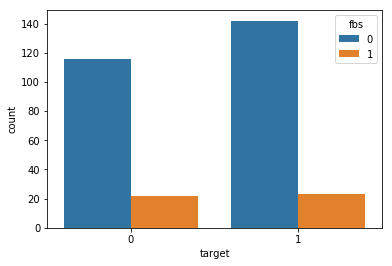

In [16]:
sns.countplot('target',hue='fbs',data = train)

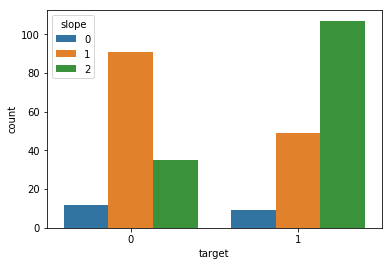

In [17]:
sns.countplot('target',hue='slope',data = train)

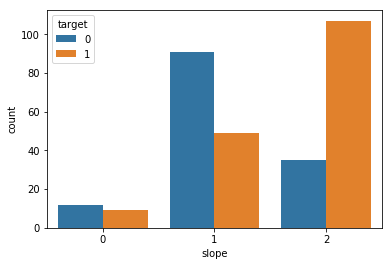

In [18]:
sns.countplot('slope',hue='target',data = train)

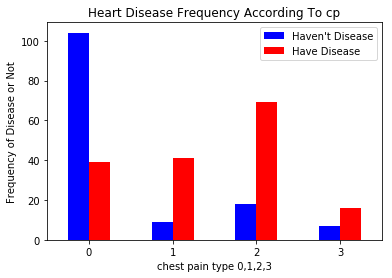

In [19]:
pd.crosstab(train.cp,train.target).plot(kind="bar", color=['blue','red' ])
plt.title('Heart Disease Frequency According To cp')
plt.xlabel('chest pain type 0,1,2,3')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

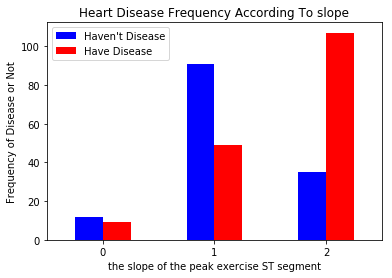

In [20]:
pd.crosstab(train.slope,train.target).plot(kind="bar", color=['blue','red' ])
plt.title('Heart Disease Frequency According To slope')
plt.xlabel('the slope of the peak exercise ST segment')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Creating Dummy Variables
> 1. Converting categorical variables to dummy variables

In [21]:
a = pd.get_dummies(train['cp'],prefix = "cp")
b = pd.get_dummies(train['slope'],prefix = "slope")
c = pd.get_dummies(train['thal'],prefix = "thal")
frames= [train, a, b, c]
train = pd.concat(frames, axis =1)

In [22]:
train.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,1,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,1,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,1,0


In [23]:
train = train.drop(columns = ['cp', 'thal', 'slope'])

In [24]:
train.head(3)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,1,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
y = train.target.values
x = train.drop(['target'], axis = 1)

# Creating Model for Logistic regression


In [27]:
X = (x - np.min(x)) / (np.max(x) - np.min(x)).values


In [28]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state = 1)

In [29]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [30]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [31]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [32]:
def forwardBackward(weight,bias,X_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,X_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / X_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(X_train,((y_head-y_train).T))/X_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/X_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [41]:
def update(weight,bias,X_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,X_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [42]:
def predict(weight,bias,X_test):
    z = np.dot(weight.T,X_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,X_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [43]:
def logistic_regression(X_train,y_train,X_test,y_test,learningRate,iteration):
    dimension = X_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,X_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],X_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.3397969961402317


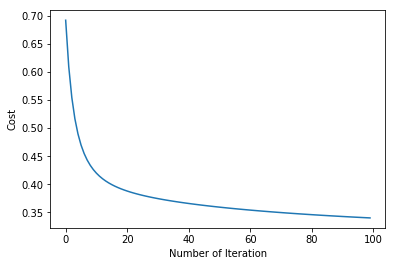

Manuel Test Accuracy: 78.69%


In [44]:
logistic_regression(X_train,y_train,X_test,y_test,1,100)

# Applying Logistic Regression

In [45]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state = 1)

In [46]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred = model.predict(x_test)

In [48]:
from sklearn.metrics import classification_report,accuracy_score
accuracy_score(y_pred,y_test)

0.7704918032786885

In [49]:
model.score(x_train, y_train)

0.8677685950413223